## Obtención y limpieza de datos

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('pokedex_mastermind.csv', index_col=0)
df.head(3)

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


Creado backup del dataframe

In [3]:
df_backup = df.copy(deep=True)

Listado de columnas

In [8]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

## 1. ¿Cuál es el tipo de pokemon más común?

In [31]:
tipos = df['type_1'].value_counts()
tipos

WATER       134
NORMAL      115
GRASS        91
BUG          81
PSYCHIC      81
FIRE         65
ELECTRIC     62
ROCK         60
DARK         46
GHOST        42
FIGHTING     42
POISON       41
GROUND       41
DRAGON       41
ICE          37
STEEL        36
FAIRY        22
FLYING        8
Name: type_1, dtype: int64

In [14]:
type_counts = df['type_1'].value_counts()  # pd Series with count of values of each pokemon type
# get the name of the most common type
type_counts[type_counts == type_counts.max()].index[0].capitalize()

'Water'

In [42]:
most_common_type = tipos[tipos == tipos.max()]
print(f'El tipo de pokemon más común es el tipo {most_common_type.index[0].capitalize()}, con {most_common_type.values[0]} ejemplares.')

El tipo de pokemon más común es el tipo Water, con 134 ejemplares.


## 2. ¿Cuál es el número de pokemons legendarios en cada generación?

In [9]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


La columna `status` guarda el tipo de pokemon

In [10]:
df['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [29]:
df['status'].value_counts()

Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: status, dtype: int64

In [30]:
legendarios = df['status'].value_counts().loc['Legendary']
print(f'Existen {legendarios} pokemon legendarios.')

Existen 42 pokemon legendarios.


## 3. Su poder cambia cada generación 

In [4]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

In [5]:
generations = df.pivot_table(index='name', columns='generation', values='attack')

In [11]:
gen_stats = df.groupby('generation')[['attack','defense']].mean()
gen_stats

,attack,defense
generation,,
1,77.302083,71.005208
2,71.869159,73.822430
3,81.030303,74.048485
4,82.867769,78.132231
5,82.976608,72.269006
6,77.188235,77.023529
7,87.313131,79.202020
8,83.571429,76.961905


In [10]:
import matplotlib.pyplot as plt

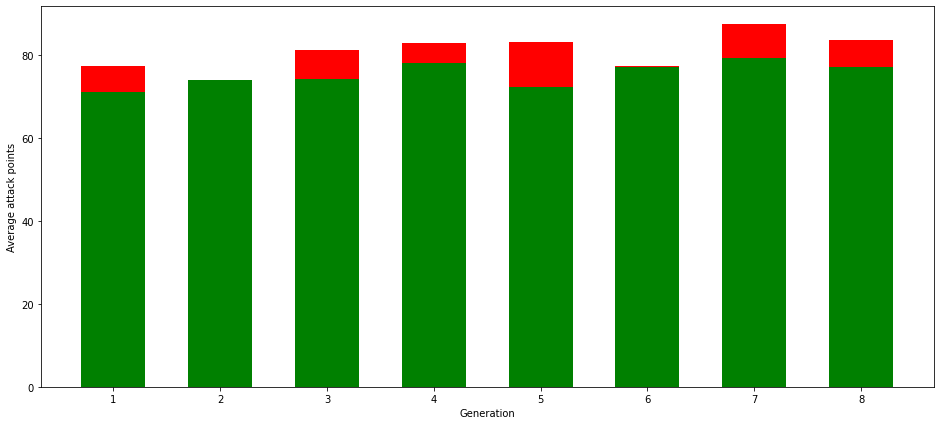

In [22]:
fig = plt.figure(figsize=(16,7))
colors = ['green', 'orange']
plt.bar(gen_stats.index, gen_stats['attack'], width=0.6, color= 'red')
plt.bar(gen_stats.index, gen_stats['defense'], width=0.6, color= 'green')

plt.xlabel('Generation')
plt.ylabel('Average attack points')
plt.show()

In [24]:
import seaborn as sns

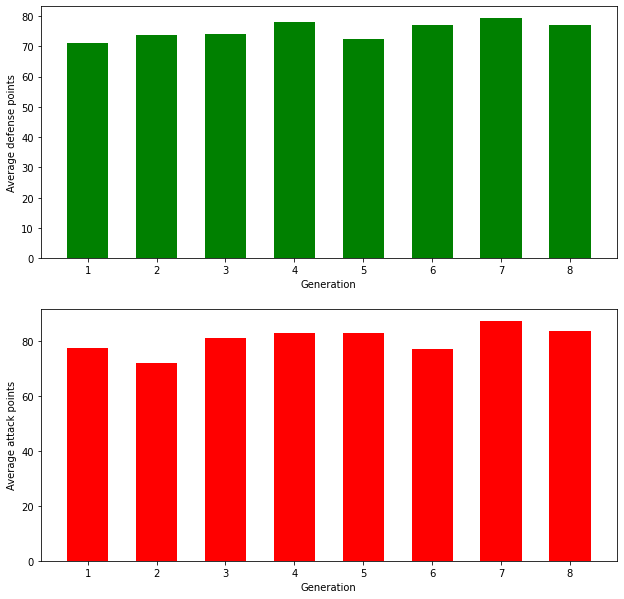

In [32]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_axes([0,0,0.5,0.5])
ax2 = fig.add_axes([0,0.6,0.5,0.5])

ax1.bar(gen_stats.index, gen_stats['attack'], width=0.6, color= 'red')
ax2.bar(gen_stats.index, gen_stats['defense'], width=0.6, color= 'green')

ax1.set_xlabel('Generation')
ax1.set_ylabel('Average attack points')

ax2.set_xlabel('Generation')
ax2.set_ylabel('Average defense points')

plt.show()

In [65]:
repeats_throughout_gens = generations.T.notna().sum() > 1
generations[repeats_throughout_gens]

generation,1,2,3,4,5,6,7,8
name,,,,,,,,


## 4. El tipo de pokemon más poderoso  

In [43]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Limpio las columnas para rechazar las columnas de ataque contra otros tipos

In [47]:
list(df.columns).index('against_normal')

16

In [67]:
clean_columns = list(df.columns)[:16]
df2 = df[clean_columns]
df2.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5%
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5%
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5%
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5%
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5%


In [80]:
attack_points = df2[['type_1','attack']].sort_values('attack', ascending=False)
attack_points['type_1'] = attack_points['type_1'].apply(lambda x : x.capitalize())
attack_points

,type_1,attack
194,Psychic,190
264,Bug,185
931,Grass,181
462,Ground,180
464,Dragon,180
...,...,...
294,Normal,10
262,Bug,10
166,Water,10
526,Normal,5


In [57]:
most_powerful = attack_points.iloc[0]
most_powerful_type = most_powerful['type_1'].capitalize()
most_powerful_attack = most_powerful['attack']
print(f'The most powerful pokemon type is {most_powerful_type}, with {most_powerful_attack} attack points.')

The most powerful pokemon type is Psychic, with 190 attack points.


Top 5 de los tipos más poderosos

In [82]:
attack_points.nlargest(5, 'attack')

,type_1,attack
194,Psychic,190
264,Bug,185
931,Grass,181
462,Ground,180
464,Dragon,180


## 5. ¿Cuáles son los pokemon más grandes? ¿Y los más pesados? ¿Y los menos densos?

In [58]:
df2.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male'],
      dtype='object')

In [61]:
tallest_pokemons = df[['name', 'height_m']].sort_values('height_m', ascending=False).head(3)
heaviest_pokemons = df[['name', 'weight_pounds']].sort_values('weight_pounds', ascending=False).head(3)
#densest_pokemons = df[['name', 'height_m']].sort_values('height_m')

Los 3 pokemon más grandes son:

In [62]:
tallest_pokemons

,name,height_m
1033,Eternatus Eternamax,100.0
1032,Eternatus,20.0
386,Wailord,14.5


Los 3 pokemon más pesados son:

In [63]:
heaviest_pokemons

,name,weight_pounds
930,Celesteela,2204.399538
923,Cosmoem,2204.399538
462,Primal Groudon,2203.958614


In [64]:
df2.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male'],
      dtype='object')

## 6. ¿Cuántos pokemons son machos y cuántos son hembras?

In [17]:
df['%_male'] = df['percentage_male'].apply(lambda x: float(x.replace('%', '')) )
df[['name', '%_male']].head()

,name,%_male
0,Bulbasaur,87.5
1,Ivysaur,87.5
2,Venusaur,87.5
3,VenusaurMega Venusaur,87.5
4,Charmander,87.5


In [18]:
male_pokemons = df[df['%_male'] == 100]
female_pokemons = df[df['%_male'] == 0]

In [24]:
pokemon_gender = pd.DataFrame({'Sexo': [male_pokemons.shape[0], female_pokemons.shape[0]]}, index= ['Machos', 'Hembras'])
pokemon_gender

,Sexo
Machos,29
Hembras,210


## 7. ¿Qué pokemons tienen más puntos de ataque que de defensa? ¿Y al contrario?

In [26]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'percentage_male_numeric', '%_male'],
      dtype='object')

In [27]:
attack_defense_pts = df[['name','attack', 'defense']]
attack_defense_pts.sample(5)

,name,attack,defense
741,Larvesta,85,55
988,Centiskorch,115,65
537,Hippopotas,72,78
503,Buizel,65,35
893,Bounsweet,30,38


In [44]:
aggresive = attack_defense_pts['attack'] > attack_defense_pts['defense']
aggresive_pokemons = attack_defense_pts[aggresive].copy(deep=True)
aggresive_pokemons.rename(columns = {'attack' : 'ATTACK'}, inplace=True)
aggresive_pokemons

,name,ATTACK,defense
4,Charmander,52,43
5,Charmeleon,64,58
6,Charizard,84,78
7,Charizard XMega Charizard X,130,111
8,Charizard YMega Charizard Y,104,78
...,...,...,...
1039,Regidrago,100,50
1040,Glastrier,145,130
1041,Spectrier,65,60
1043,Calyrex Ice Rider,165,150


In [ ]:
help(pd.DataFrame.rename

In [45]:
defensive = attack_defense_pts['attack'] < attack_defense_pts['defense']
defensive_pokemons = attack_defense_pts[defensive].copy(deep=True)
defensive_pokemons.rename(columns = {'defense' : 'DEFENSE'}, inplace=True)
defensive_pokemons

,name,attack,DEFENSE
1,Ivysaur,62,63
2,Venusaur,82,83
3,VenusaurMega Venusaur,100,123
9,Squirtle,48,65
10,Wartortle,63,80
...,...,...,...
1023,Arctovish,90,100
1024,Duraludon,95,115
1030,Zamazenta Crowned Shield,130,145
1032,Eternatus,85,95


In [46]:
print(f'Hay {aggresive_pokemons.shape[0]} pokemon con mayor puntuación en ataque que en defensa. \
Por otro lado, {defensive_pokemons.shape[0]} pokemon tienen más puntos de defensa que de ataque.')

Hay 566 pokemon con mayor puntuación en ataque que en defensa. Por otro lado, 374 pokemon tienen más puntos de defensa que de ataque.
